# Insurance Costs Prediction using Ensemble Learners

The aims of this project is to build an insurance costs prediction model using ensemble learners. The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability (robustness) over a single estimator. For the purpose of this project, we use three different methods, there are:

- Random Forest
- AdaBoost
- Gradient Boosting Tree

***
Variables included in the dataset :
- charges   : individual medical costs billed by health insurance
- age‎‎       : age of primary beneficiary
- sex       ‎: insurance contractor gender, female, male
- bmi       : body mass index
- children  : number of children covered by health insurance
- smoker    : smoking
- region    : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

***

Dataset source : https://github.com/stedy/Machine-Learning-with-R-datasets

Import Library

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

plt.style.use('fivethirtyeight')

Load Dataset

In [2]:
dataset = pd.read_csv("dataset/insurance.csv")
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Check if any value is NaN

In [3]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

It can be seen that some variables such as sex, smoking, and region are in categorical, therefore the LabelEncoder function is used to encode the data form to numeric.

In [4]:
label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


Shows statistical measures of the dataset

In [5]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Plot the histogram of each column

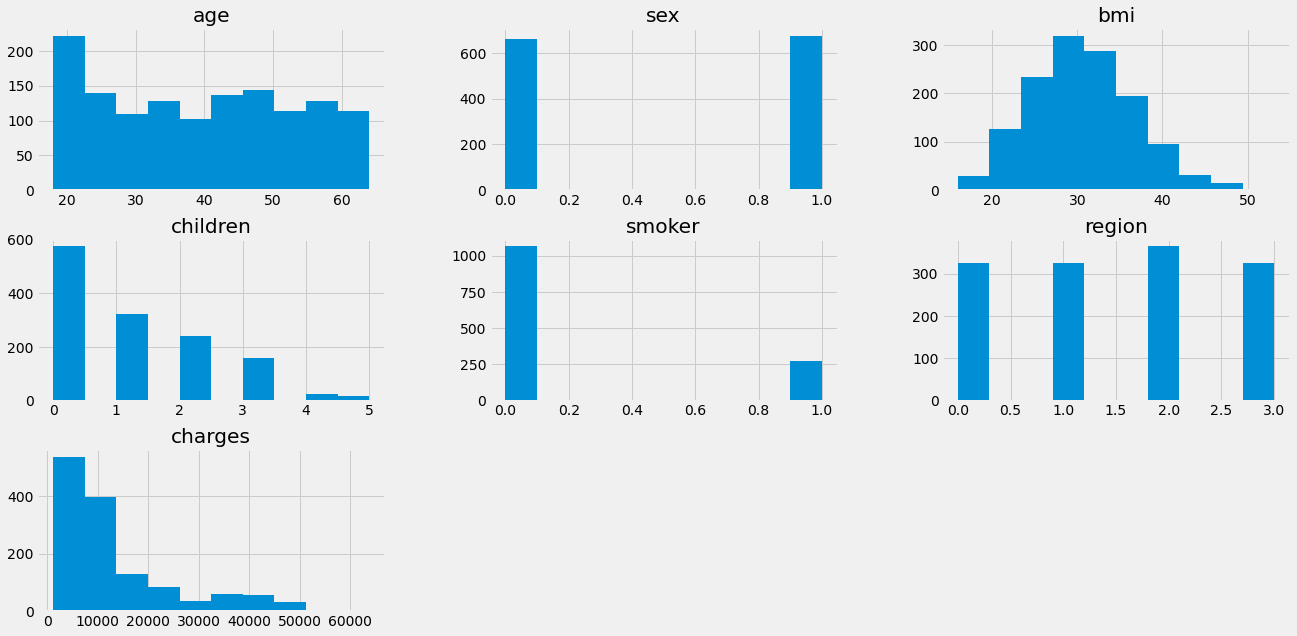

In [6]:
dataset.hist(figsize=(20,10));

Shows Pearson's correlation from the independent variable to the dependent variable (charges)

In [7]:
dataset.corr(method = 'pearson')['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

It can be seen that smokers have a high correlation with medical insurance costs, and regions have a low correlation with insurance costs, so that the next column region will be dropped

Separating dependent variables and independent variables

In [8]:
x = dataset.iloc[:, :6]
y = dataset.iloc[:, 6:]

Data scaling using StandardScaler

In [9]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Splitting data into train and test set

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

Building Gradient Boosting, Random Forest, and AdaBoost models

In [11]:
gb = GradientBoostingRegressor().fit(x_train, y_train.values.ravel())   # Gradient Boosting Regressor
rf = RandomForestRegressor().fit(x_train, y_train.values.ravel())               
adb = AdaBoostRegressor().fit(x_train, y_train.values.ravel())

In [12]:
def get_results(model, x_train, x_test, y_train, y_test):
    train_prediction = model.predict(x_train)
    test_prediction = model.predict(x_test)

    train_rsq = model.score(x_train, y_train)
    test_rsq = model.score(x_test, y_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_prediction))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_prediction))

    return train_rsq, test_rsq, train_rmse, test_rmse

In [13]:
gb_rsq_train, gb_rsq_test, gb_rmse_train, gb_rmse_test = get_results(gb, x_train, x_test, y_train, y_test)
rf_rsq_train, rf_rsq_test, rf_rmse_train, rf_rmse_test = get_results(rf, x_train, x_test, y_train, y_test)
adb_rsq_train, adb_rsq_test, adb_rmse_train, adb_rmse_test = get_results(adb, x_train, x_test, y_train, y_test)

In [14]:
results = [
    ['Gradient Boosting', gb_rsq_train, gb_rsq_test, gb_rmse_train, gb_rmse_test], 
    ['Random Forest', rf_rsq_train, rf_rsq_test, rf_rmse_train, rf_rmse_test], 
    ['AdaBoost', adb_rsq_train, adb_rsq_test, adb_rmse_train, adb_rmse_test]
]    

result_table = pd.DataFrame(results, columns= ['Method', 'R\u00b2 Train', 'R\u00b2 Test', 'RMSE Train', 'RMSE Test'])
result_table.round(3)

,Method,R² Train,R² Test,RMSE Train,RMSE Test
0,Gradient Boosting,0.898,0.878,3836.065,4358.635
1,Random Forest,0.976,0.867,1870.168,4550.875
2,AdaBoost,0.820,0.817,5091.060,5328.425


From the three models that have been built above, it can be seen that the Gradient Boosting model is decent with obtained R2 = 0.878 and RMSE = 4351.77 based on testing in the test set.


Shows the prediction and residual plot of Gradient Boosting model result

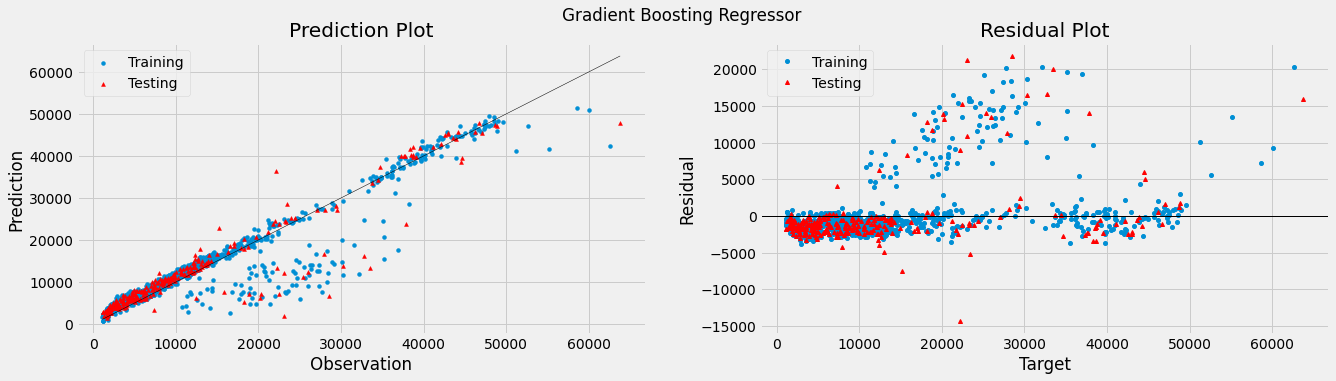

In [15]:
gb_train_pred = gb.predict(x_train).reshape(1070, 1)
gb_test_pred = gb.predict(x_test).reshape(268, 1)

residual_train = y_train - gb_train_pred
residual_test = y_test - gb_test_pred

fig=plt.figure(figsize=(20,5))
plt.suptitle('Gradient Boosting Regressor')

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, gb_train_pred, s=15, label='Training')
ax1.scatter(y_test, gb_test_pred, marker='^', s=15, c='r', label='Testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=0.5)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Observation')
ax1.set_ylabel('Prediction')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='Training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='Testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('Target')
ax2.set_ylabel('Residual')

plt.show()